In [2]:
import numpy as np
import pandas as pd
import nltk
from nltk.stem.snowball import SnowballStemmer
from bs4 import BeautifulSoup
import re
import os
import codecs
from sklearn import feature_extraction
#import mpld3

Read movie titles, 100 movies; the last one is empty string

In [3]:
titles = open('data/title_list.txt').read().split('\n')

In [4]:
len(titles)

101

In [6]:
titles[:10]

['The Godfather',
 'The Shawshank Redemption',
 "Schindler's List",
 'Raging Bull',
 'Casablanca',
 "One Flew Over the Cuckoo's Nest",
 'Gone with the Wind',
 'Citizen Kane',
 'The Wizard of Oz',
 'Titanic']

In [7]:
titles = titles[:100]
# Just turning it around

Read Genres information

In [8]:
genres = open('data/genres_list.txt').read().split('\n')
genres = genres[:100]

In [9]:
genres[0]

"[u' Crime', u' Drama']"

Read in the synopses from wiki

In [10]:
#Q -> encoding='utf-8' ?
synopses_wiki = open('data/synopses_list_wiki.txt', encoding='utf-8').read().split('\n BREAKS HERE')

In [11]:
len(synopses_wiki)

101

In [12]:
synopses_wiki = synopses_wiki[:100]

In [13]:
synopses_wiki[0]

' Plot  [edit]  [  [  edit  edit  ]  ]  \n  On the day of his only daughter\'s wedding, Vito Corleone hears requests in his role as the Godfather, the Don of a New York crime family. Vito\'s youngest son, Michael, in a Marine Corps uniform, introduces his girlfriend, Kay Adams, to his family at the sprawling reception. Vito\'s godson Johnny Fontane, a popular singer, pleads for help in securing a coveted movie role, so Vito dispatches his consigliere, Tom Hagen, to Los Angeles to influence the abrasive studio head, Jack Woltz. Woltz is unmoved until the morning he wakes up in bed with the severed head of his prized stallion.  On the day of his only daughter\'s wedding,   Vito Corleone  Vito Corleone   hears requests in his role as the Godfather, the   Don  Don   of a New York crime family. Vito\'s youngest son,   Michael  Michael  , in a   Marine Corps  Marine Corps   uniform, introduces his girlfriend,   Kay Adams  Kay Adams  , to his family at the sprawling reception. Vito\'s godson 

strips html formatting and converts to unicode

In [14]:
synopses_clean_wiki = []
for text in synopses_wiki:
    text = BeautifulSoup(text, 'html.parser').getText()
    synopses_clean_wiki.append(text)
synopses_wiki = synopses_clean_wiki

In [15]:
synopses_wiki[0]

' Plot  [edit]  [  [  edit  edit  ]  ]  \n  On the day of his only daughter\'s wedding, Vito Corleone hears requests in his role as the Godfather, the Don of a New York crime family. Vito\'s youngest son, Michael, in a Marine Corps uniform, introduces his girlfriend, Kay Adams, to his family at the sprawling reception. Vito\'s godson Johnny Fontane, a popular singer, pleads for help in securing a coveted movie role, so Vito dispatches his consigliere, Tom Hagen, to Los Angeles to influence the abrasive studio head, Jack Woltz. Woltz is unmoved until the morning he wakes up in bed with the severed head of his prized stallion.  On the day of his only daughter\'s wedding,   Vito Corleone  Vito Corleone   hears requests in his role as the Godfather, the   Don  Don   of a New York crime family. Vito\'s youngest son,   Michael  Michael  , in a   Marine Corps  Marine Corps   uniform, introduces his girlfriend,   Kay Adams  Kay Adams  , to his family at the sprawling reception. Vito\'s godson 

Read synopses information from imdb, which might be different from wiki. Also cleaned as above.

In [16]:
synopses_imdb = open('data/synopses_list_imdb.txt').read().split('\n BREAKS HERE')
synopses_imdb = synopses_imdb[:100]
print(synopses_imdb[0])

synopses_clean_imdb = []

for text in synopses_imdb:
    text = BeautifulSoup(text, 'html.parser').getText()
    synopses_clean_imdb.append(text)
synopses_imdb = synopses_clean_imdb



In late summer 1945, guests are gathered for the wedding reception of Don Vito Corleone's daughter Connie (Talia Shire) and Carlo Rizzi (Gianni Russo). Vito (Marlon Brando), the head of the Corleone Mafia family, is known to friends and associates as "Godfather." He and Tom Hagen (Robert Duvall), the Corleone family lawyer, are hearing requests for favors because, according to Italian tradition, "no Sicilian can refuse a request on his daughter's wedding day." One of the men who asks the Don for a favor is Amerigo Bonasera, a successful mortician and acquaintance of the Don, whose daughter was brutally beaten by two young men because she refused their advances; the men received minimal punishment. The Don is disappointed in Bonasera, who'd avoided most contact with the Don due to Corleone's nefarious business dealings. The Don's wife is godmother to Bonasera's shamed daughter, a relationship the Don uses to extract new loyalty from the undertaker. The Don agrees to have his men punis

In [17]:
print(synopses_imdb[0])



In late summer 1945, guests are gathered for the wedding reception of Don Vito Corleone's daughter Connie (Talia Shire) and Carlo Rizzi (Gianni Russo). Vito (Marlon Brando), the head of the Corleone Mafia family, is known to friends and associates as "Godfather." He and Tom Hagen (Robert Duvall), the Corleone family lawyer, are hearing requests for favors because, according to Italian tradition, "no Sicilian can refuse a request on his daughter's wedding day." One of the men who asks the Don for a favor is Amerigo Bonasera, a successful mortician and acquaintance of the Don, whose daughter was brutally beaten by two young men because she refused their advances; the men received minimal punishment. The Don is disappointed in Bonasera, who'd avoided most contact with the Don due to Corleone's nefarious business dealings. The Don's wife is godmother to Bonasera's shamed daughter, a relationship the Don uses to extract new loyalty from the undertaker. The Don agrees to have his men punis

Combine synopses from wiki and imdb

In [18]:
synopses = []
for i in range(len(synopses_wiki)):
    item = synopses_wiki[i] + synopses_imdb[i]
    synopses.append(item)

In [50]:
#synopses[0]

In [20]:
print(str(len(titles)) + ' titles')
print(str(len(genres)) + ' genres')
print(str(len(synopses)) + ' synopses')

100 titles
100 genres
100 synopses


In [21]:
# generates index for each item in the corpora (in this case it's just rank) and I'll use this for scoring later
# the movies in the list are already ranked from 1 to 100
ranks = []
for i in range(1, len(titles)+1):
    ranks.append(i)

# Start Code Here

In [22]:
# load nltk's English stopwords as variable called 'stopwords'
# use nltk.download() to install the corpus first
# Stop Words are words which do not contain important significance to be used in Search Queries

##########   CODE BELOW    ##########

stopwords = nltk.corpus.stopwords.words('english')

##########   CODE ABOVE    ##########

# load nltk's SnowballStemmer as variabled 'stemmer'

##########   CODE BELOW    ##########

stemmer = SnowballStemmer("english")

##########   CODE ABOVE    ##########

In [23]:
len(stopwords)

179

In [24]:
stopwords[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [25]:
#Q -> why should we not directly use sents = nltk.sent_tokenise(..) ?
sents = [sent for sent in nltk.sent_tokenize("Today (May 19, 2016) is his only daughter's wedding. Vito Corleone is the Godfather. Vito's youngest son, Michael, in a Marine Corps uniform, introduces his girlfriend, Kay Adams, to his family at the sprawling reception.")]

In [26]:
# Tokenize documents into sentences

#Create a variable 'sents' which is a list of strings obtained by tokenizing the string below:
this_str='''Today (May 19, 2016) is his only daughter's wedding. Vito Corleone is the Godfather. Vito's youngest son, Michael, in a Marine Corps uniform, introduces his girlfriend, Kay Adams, to his family at the sprawling reception.'''

##########   CODE BELOW    ##########

sents = [sent for sent in nltk.sent_tokenize(this_str)]

##########   CODE ABOVE    ##########

In [27]:
sents

["Today (May 19, 2016) is his only daughter's wedding.",
 'Vito Corleone is the Godfather.',
 "Vito's youngest son, Michael, in a Marine Corps uniform, introduces his girlfriend, Kay Adams, to his family at the sprawling reception."]

In [28]:
# Tokenize sentences into words

#Create a variable 'words' which is a list of strings obtained by tokenizing the first string in sents 

##########   CODE BELOW    ##########

words = [word for word in nltk.word_tokenize(sents[0])]

##########   CODE ABOVE    ##########

In [29]:
words

['Today',
 '(',
 'May',
 '19',
 ',',
 '2016',
 ')',
 'is',
 'his',
 'only',
 'daughter',
 "'s",
 'wedding',
 '.']

In [30]:
# filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
filtered_words = []
for word in words:
        if re.search('[a-zA-Z]', word):
            filtered_words.append(word)
filtered_words

['Today', 'May', 'is', 'his', 'only', 'daughter', "'s", 'wedding']

In [31]:
# Stem words 

#Create a variable 'stems' which is a list of stemmed words obtained by stemming filtered_words

##########   CODE BELOW    ##########

stems = [stemmer.stem(word) for word in filtered_words]

##########   CODE ABOVE    ##########

In [32]:
# see how "only" is stemmed to "onli" and "wedding" is stemmed to "wed"
stems

['today', 'may', 'is', 'his', 'onli', 'daughter', "'s", 'wed']

### Pause Code Here

In [33]:
# here I define a tokenizer and stemmer which returns the set of stems in the text that it is passed
# Punkt Sentence Tokenizer, sent means sentence 
def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

In [34]:
def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [35]:
words_stemmed = tokenize_and_stem("Today (May 19, 2016) is his only daughter's wedding.")
print(words_stemmed)

['today', 'may', 'is', 'his', 'onli', 'daughter', "'s", 'wed']


In [36]:
words_only = tokenize_only("Today (May 19, 2016) is his only daughter's wedding.")
words_only

['today', 'may', 'is', 'his', 'only', 'daughter', "'s", 'wedding']

Below I use my stemming/tokenizing and tokenizing functions to iterate over the list of synopses to create two vocabularies: one stemmed and one only tokenized

In [37]:
totalvocab_stemmed = []
totalvocab_tokenized = []
for i in synopses:
    allwords_stemmed = tokenize_and_stem(i) # for each item in 'synopses', tokenize/stem
    totalvocab_stemmed.extend(allwords_stemmed) # extend the 'totalvocab_stemmed' list
    
    allwords_tokenized = tokenize_only(i)
    totalvocab_tokenized.extend(allwords_tokenized)

In [38]:
print(len(totalvocab_stemmed))
print(len(totalvocab_tokenized))

312307
312307


In [39]:
vocab_frame = pd.DataFrame({'words': totalvocab_tokenized}, index = totalvocab_stemmed)
print('there are ' + str(vocab_frame.shape[0]) + ' items in vocab_frame')
print(vocab_frame.head())

there are 312307 items in vocab_frame
     words
plot  plot
edit  edit
edit  edit
edit  edit
on      on


### Resume Code Here

Generate TF-IDF matrix (see http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)

In [52]:
# Note that the result of this block takes a while to show

#Import TfidfVectorizer from sklearn.feature_extraction.text

##########   CODE BELOW    ##########

from sklearn.feature_extraction.text import TfidfVectorizer

##########   CODE ABOVE    ##########



#define vectorizer parameters

# Create a TfidfVectorizer named tfidf_vectorizer with the below configuration

##########   CODE BELOW    ##########

tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 min_df=0.2, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1, 4))

##########   CODE ABOVE    ##########


#fit transform synopses to tfidf_vectorizer and store as tfidf_matrix

##########   CODE BELOW    ##########

tfidf_matrix = tfidf_vectorizer.fit_transform(synopses)

##########   CODE ABOVE    ##########

# (100, 563) means the matrix has 100 rows and 563 columns
print(tfidf_matrix.shape)
terms = tfidf_vectorizer.get_feature_names()
len(terms)

(100, 563)


563

In [57]:
print(terms[:20])

["'d", "'s death", "'s father", "'s friend", "'s hous", "'s mother", 'abandon', 'abl', 'accept', 'accid', 'accompani', 'accus', 'act', 'action', 'actual', 'admit', 'afterward', 'ago', 'agre', 'air']


Now onto the fun part. Using the tf-idf matrix, you can run a slew of clustering algorithms to better understand the hidden structure within the synopses. I first chose k-means. K-means initializes with a pre-determined number of clusters (I chose 5). Each observation is assigned to a cluster (cluster assignment) so as to minimize the within cluster sum of squares. Next, the mean of the clustered observations is calculated and used as the new cluster centroid. Then, observations are reassigned to clusters and centroids recalculated in an iterative process until the algorithm reaches convergence.

I found it took several runs for the algorithm to converge a global optimum as k-means is susceptible to reaching local optima - how to decide that the algorithm converged???

In [59]:
#import KMeans from sklearn.cluster
#create KMeans object km with n_clusters = 5

##########   CODE BELOW    ##########

from sklearn.cluster import KMeans
km = KMeans(n_clusters=5)

##########   CODE ABOVE    ##########

#fit tfidf_matrix to km 

##########   CODE BELOW    ##########

km.fit(tfidf_matrix)

##########   CODE ABOVE    ##########

clusters = km.labels_.tolist()

In [61]:
#clusters

### Pause Code Here

Here, I create a dictionary of titles, ranks, the synopsis, the cluster assignment, and the genre [rank and genre were scraped from IMDB].
I convert this dictionary to a Pandas DataFrame for easy access. I'm a huge fan of Pandas and recommend taking a look at some of its awesome functionality which I'll use below, but not describe in a ton of detail.

In [62]:
films = { 'title': titles, 'rank': ranks, 'synopsis': synopses, 'cluster': clusters, 'genre': genres }

frame = pd.DataFrame(films, index = [clusters] , columns = ['rank', 'title', 'cluster', 'genre'])

print(frame) # here the ranking is still 0 to 99

frame['cluster'].value_counts() #number of films per cluster (clusters from 0 to 4)


    rank                                              title  cluster  \
3      1                                      The Godfather        3   
3      2                           The Shawshank Redemption        3   
1      3                                   Schindler's List        1   
3      4                                        Raging Bull        3   
4      5                                         Casablanca        4   
4      6                    One Flew Over the Cuckoo's Nest        4   
0      7                                 Gone with the Wind        0   
0      8                                       Citizen Kane        0   
4      9                                   The Wizard of Oz        4   
1     10                                            Titanic        1   
1     11                                 Lawrence of Arabia        1   
3     12                             The Godfather: Part II        3   
4     13                                             Psycho     

4    38
1    21
3    19
0    15
2     7
Name: cluster, dtype: int64

Note that clusters 4 and 0 have the lowest rank, which indicates that they, on average, contain films that were ranked as "better" on the top 100 list.
Here is some fancy indexing and sorting on each cluster to identify which are the top n (I chose n=6) words that are nearest to the cluster centroid. This gives a good sense of the main topic of the cluster.

In [64]:
print("Top terms per cluster:")

num_clusters = 5

#sort cluster centers by proximity to centroid
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

for i in range(num_clusters):
    print("Cluster %d words:" % i, end='')
    
    for ind in order_centroids[i, :6]: #replace 6 with n words per cluster
        print(' %s' % vocab_frame.loc[terms[ind].split(' ')].values.tolist()[0][0].encode('utf-8', 'ignore'), end=',')
    print() #add whitespace
    print() #add whitespace
    
    print("Cluster %d titles:" % i, end='')
    for title in frame.loc[i]['title'].values.tolist():
        print(' %s,' % title, end='')
    print() #add whitespace
    print() #add whitespace


Top terms per cluster:
Cluster 0 words: b'love', b'family', b'marries', b'children', b'home', b'war',

Cluster 0 titles: Gone with the Wind, Citizen Kane, Forrest Gump, The Sound of Music, The Best Years of Our Lives, Doctor Zhivago, Goodfellas, It Happened One Night, Midnight Cowboy, Mr. Smith Goes to Washington, Annie Hall, Out of Africa, Terms of Endearment, Giant, Wuthering Heights,

Cluster 1 words: b'soldiers', b'water', b'killed', b'command', b'army', b'men',

Cluster 1 titles: Schindler's List, Titanic, Lawrence of Arabia, Star Wars, 2001: A Space Odyssey, Chinatown, The Bridge on the River Kwai, Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb, Apocalypse Now, The Lord of the Rings: The Return of the King, Saving Private Ryan, Raiders of the Lost Ark, Patton, Jaws, Butch Cassidy and the Sundance Kid, The Treasure of the Sierra Madre, Platoon, Dances with Wolves, All Quiet on the Western Front, The African Queen, Mutiny on the Bounty,

Cluster 2 words: b'geo

### Resume Code Here

Cosine similarity is measured against the tf-idf matrix and can be used to generate a measure of similarity between each document and the other documents in the corpus (each synopsis among the synopses). cosine similarity 1 means the same document, 0 means totally different ones. dist is defined as 1 - the cosine similarity of each document.  Subtracting it from 1 provides cosine distance which I will use for plotting on a euclidean (2-dimensional) plane.
Note that with dist it is possible to evaluate the similarity of any two or more synopses.

In [65]:
#import cosine_similarity from sklearn.metrics.pairwise

#calculate cosine_similarity with argument tfidf_matrix and store in variable cs 

#calculate similarity_distance as 1 - cs

##########   CODE BELOW    ##########

from sklearn.metrics.pairwise import cosine_similarity 

cs = cosine_similarity(tfidf_matrix)

similarity_distance = 1 - cs

##########   CODE ABOVE    ##########

In [66]:
#import matplotlib.pyplot as plt and configure it to output inline

##########   CODE BELOW    ##########

import matplotlib.pyplot as plt
%matplotlib inline

##########   CODE ABOVE    ##########

In [67]:
#import linkage and dendrogram from scipy.cluster.hierarchy

##########   CODE BELOW    ##########

from scipy.cluster.hierarchy import linkage, dendrogram

##########   CODE ABOVE    ##########

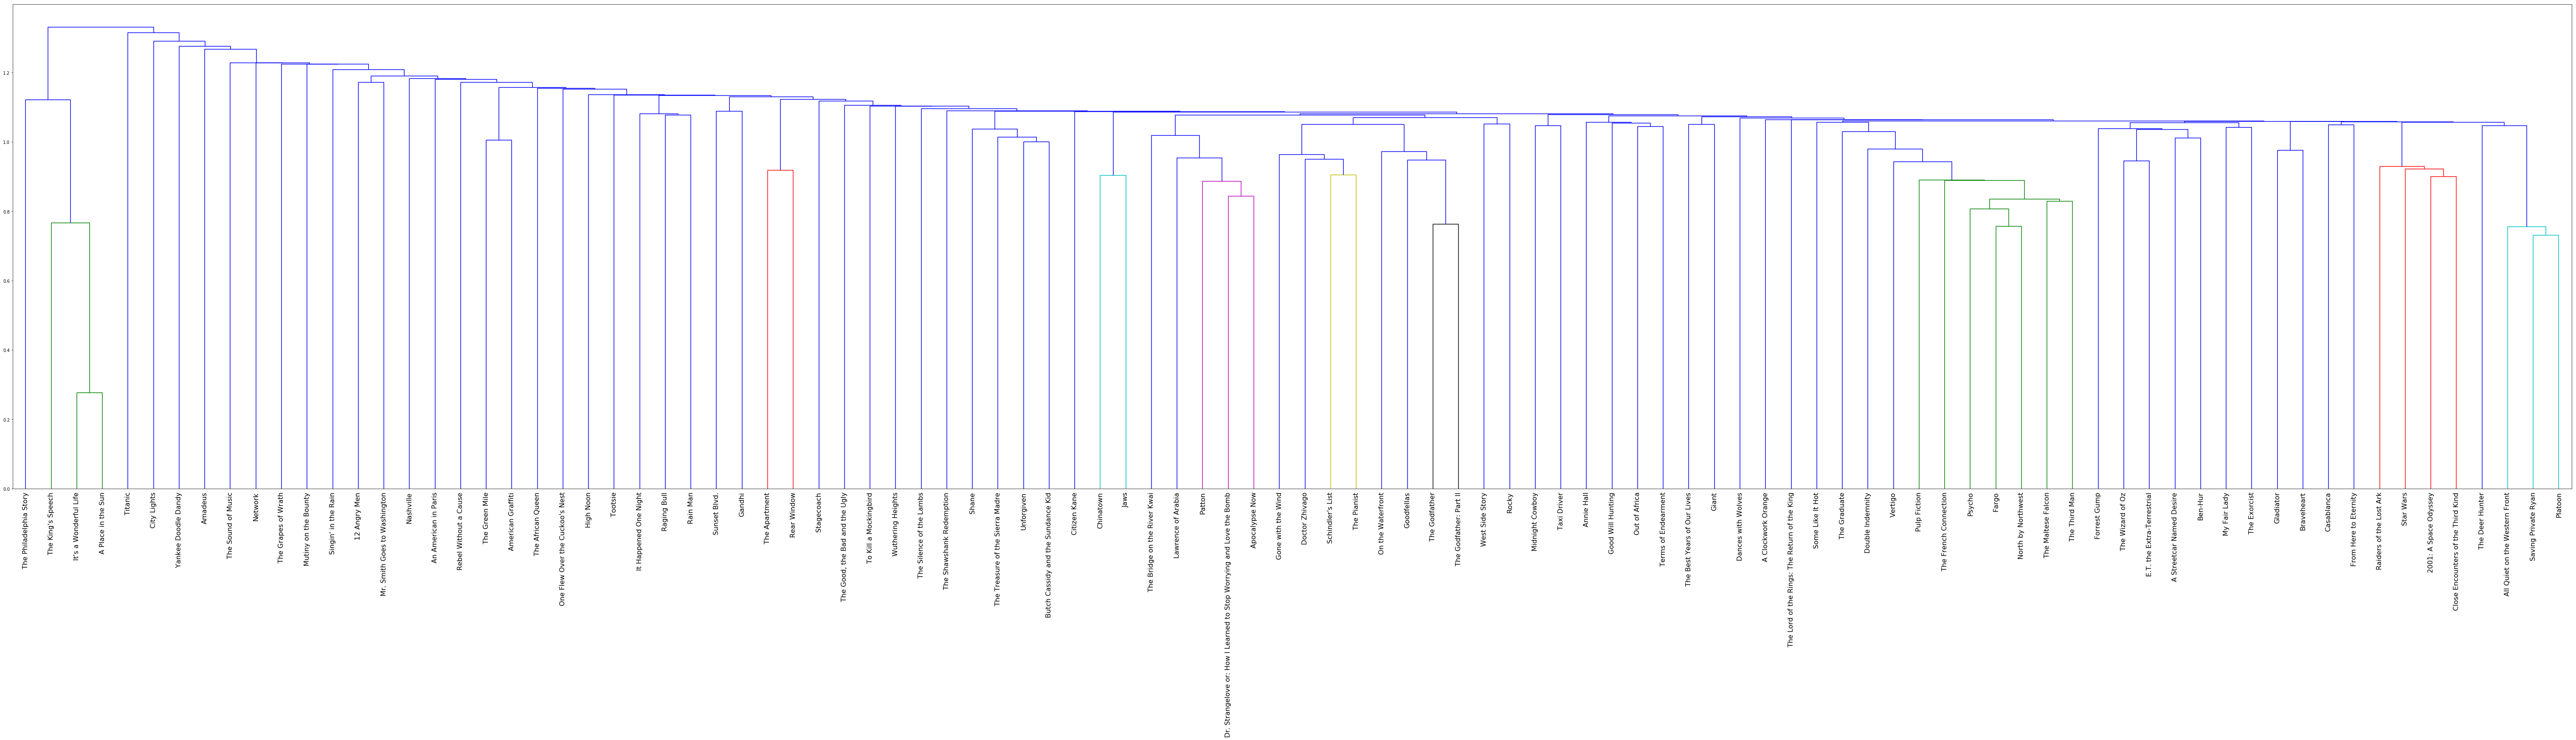

In [68]:
#create mergings as an linkage object over similarity_distance.

##########   CODE BELOW    ##########

mergings = linkage(similarity_distance)

# Plot the dendrogram, using titles as labels
dendrogram(mergings,
           labels=titles,
           leaf_rotation=90,
           leaf_font_size=16,
)

##########   CODE ABOVE    ##########

fig = plt.gcf()
fig.set_size_inches(108, 21)

plt.show()

# That's All Fox!